# Aculei notebook

This notebook is a collection of visuals to better understand the aculei dataset.

In [116]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

rc={
    'axes.titlesize' : 14,
    'figure.figsize' : (12, 6),
    'legend.fontsize' : 10,
    'lines.linewidth' : 1.0,
    'lines.markersize' : 5.0,
    'xtick.labelsize' : 10,
    'ytick.labelsize' : 10,
}

sns.set_theme(context='notebook', style='whitegrid', palette="Set3", rc=rc)

In [117]:
data_folder = 'data/'
image_folder = 'images/'
df = pd.read_csv(os.path.join(data_folder, 'archive.csv'))

Filter out crazy temperatures

In [118]:
df.temperature = df.temperature.apply(lambda x: x if x > -10 and x < 40 else None)

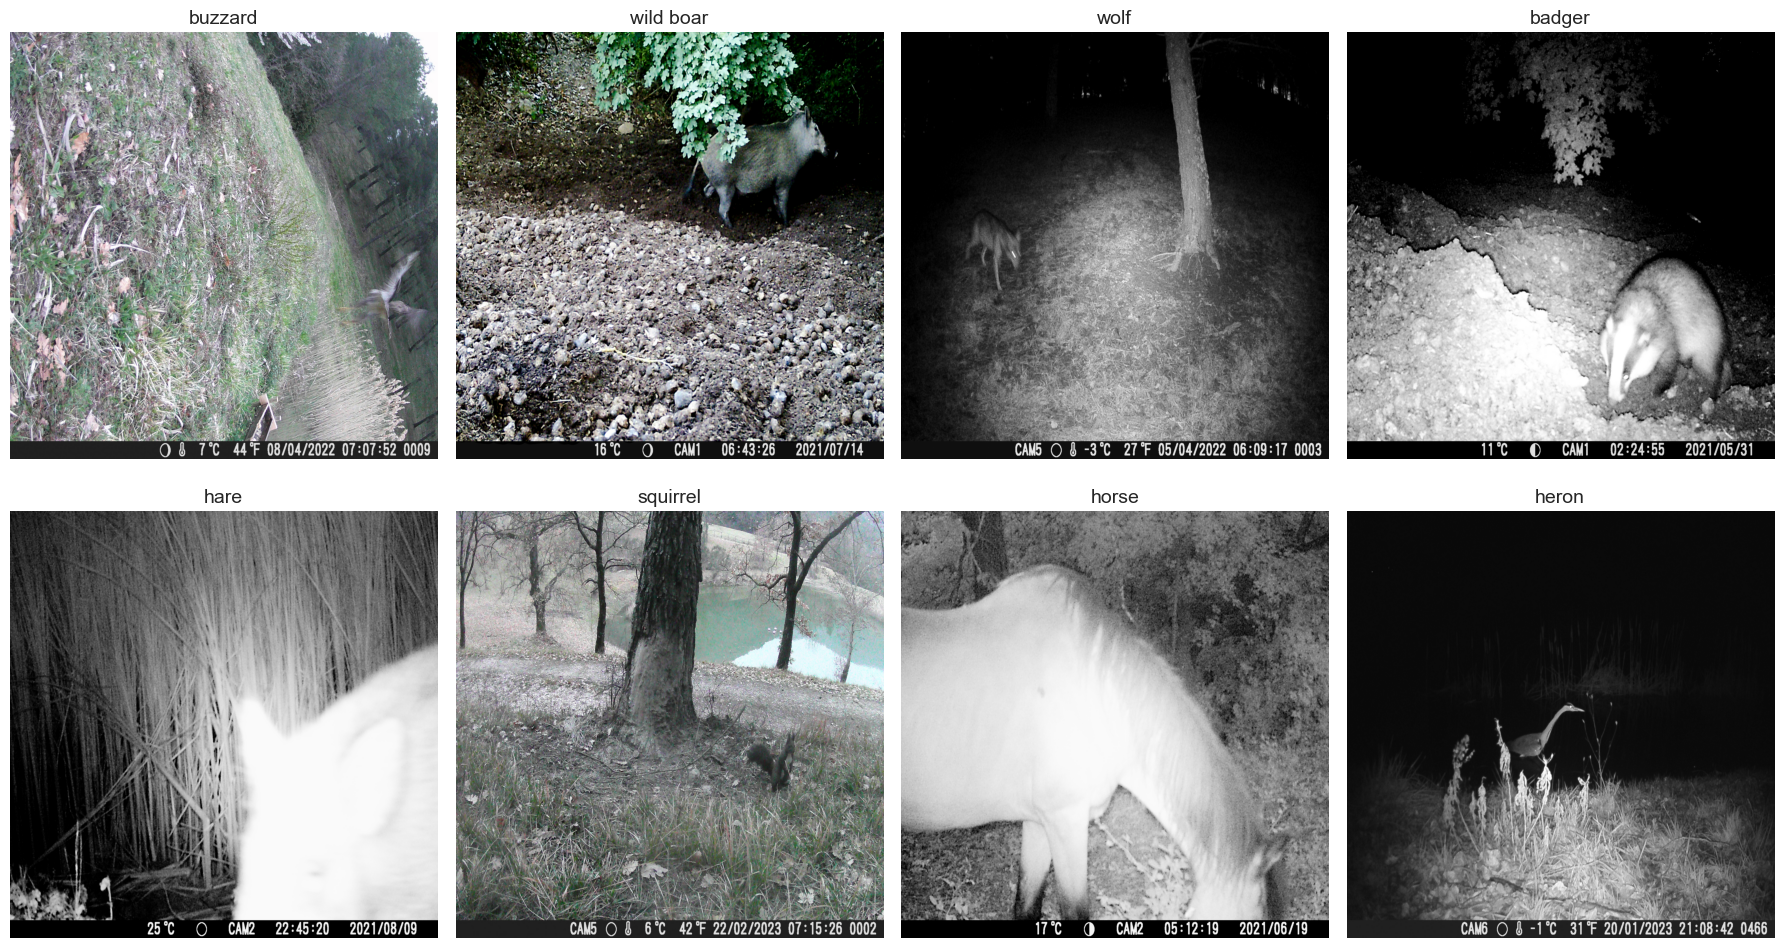

In [133]:
from PIL import Image

# Ensure we have at least 8 unique samples
subset = df.sample(200).drop_duplicates(subset=['predicted_animal'], keep='last').sample(8).reset_index()

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for i, row in subset.iterrows():
    path = os.path.join(image_folder, row.cam, row.image_name)
    img = Image.open(path)
    img = img.resize((2048, 2048))
    ax = axes[i // 4, i % 4]
    ax.imshow(img)
    ax.title.set_text(row.predicted_animal)
    ax.axis('off')

plt.tight_layout()
plt.show()

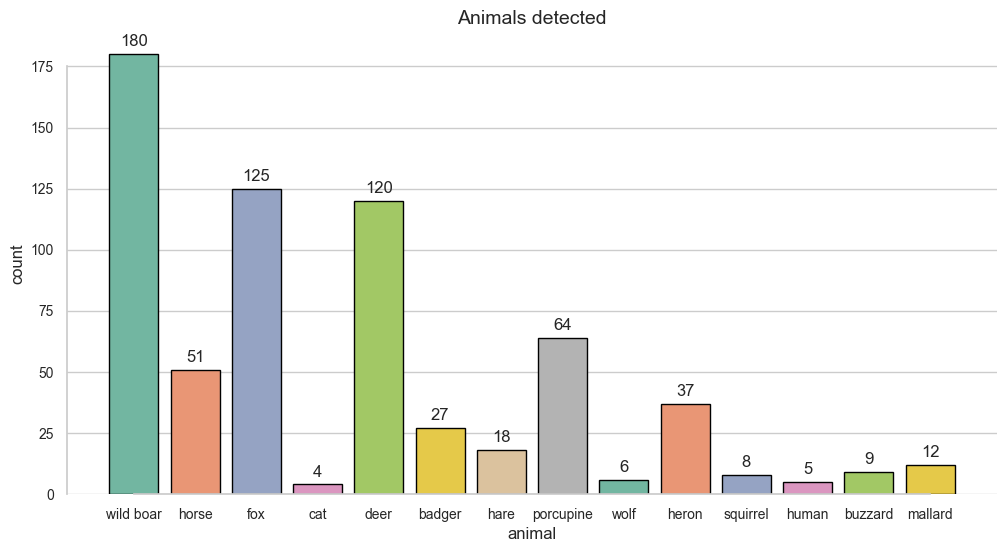

In [120]:
f, ax = plt.subplots()
c = sns.countplot(df, x="predicted_animal", hue="predicted_animal", legend=False, palette="Set2", ec="black", ax=ax)

for p in c.patches:
    c.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

ax.set_title('Animals detected')
ax.set_xlabel('animal')
ax.set_ylabel('count')

c.axes.margins(.05)
sns.despine(trim=True)
plt.show()

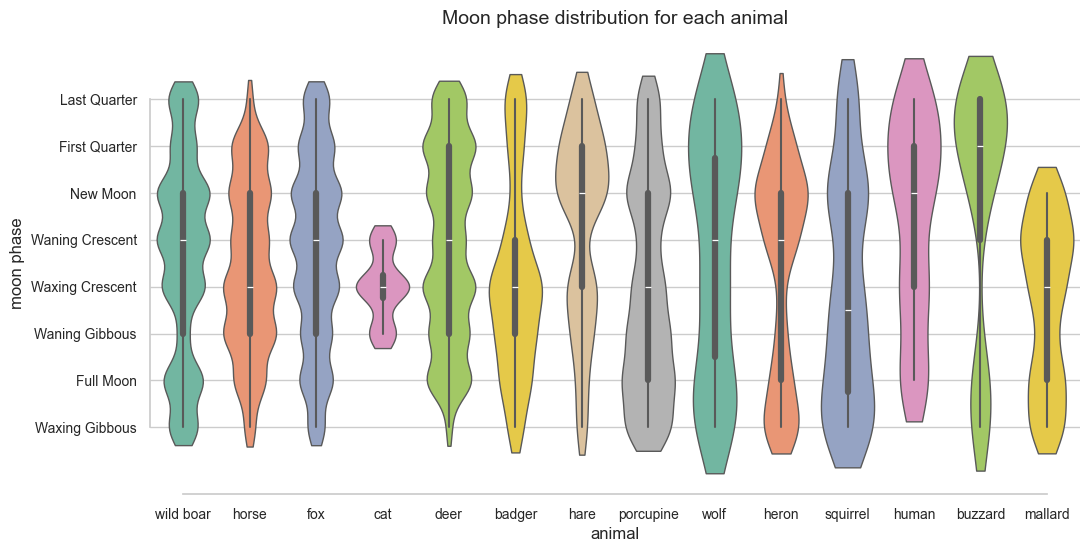

In [121]:
f, ax = plt.subplots()

v = sns.violinplot(data=df, hue="predicted_animal", x="predicted_animal", y="moon_phase", 
               bw_adjust=.5, cut=1, linewidth=1, palette='Set2', legend=False, ax=ax)

ax.set_ylabel('moon phase')
ax.set_xlabel('animal')

sns.despine(trim=True)
plt.title('Moon phase distribution for each animal')
plt.show()

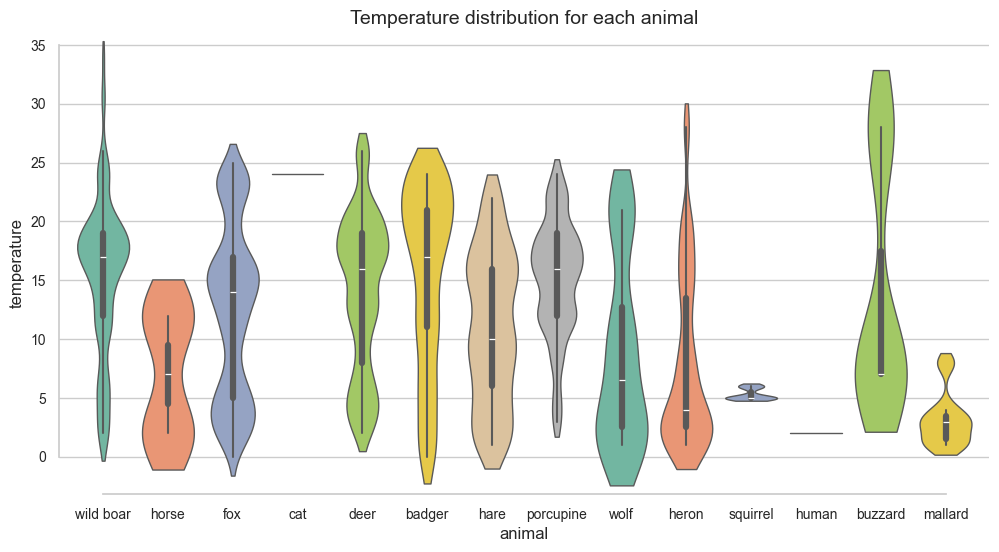

In [122]:
f, ax = plt.subplots()

v = sns.violinplot(data=df, hue="predicted_animal", x="predicted_animal", y="temperature", 
               bw_adjust=.5, cut=1, linewidth=1, palette='Set2', legend=False, ax=ax)

ax.set_ylabel('temperature')
ax.set_xlabel('animal')

v.axes.margins(.02)

sns.despine(trim=True)
plt.title('Temperature distribution for each animal')
plt.show()

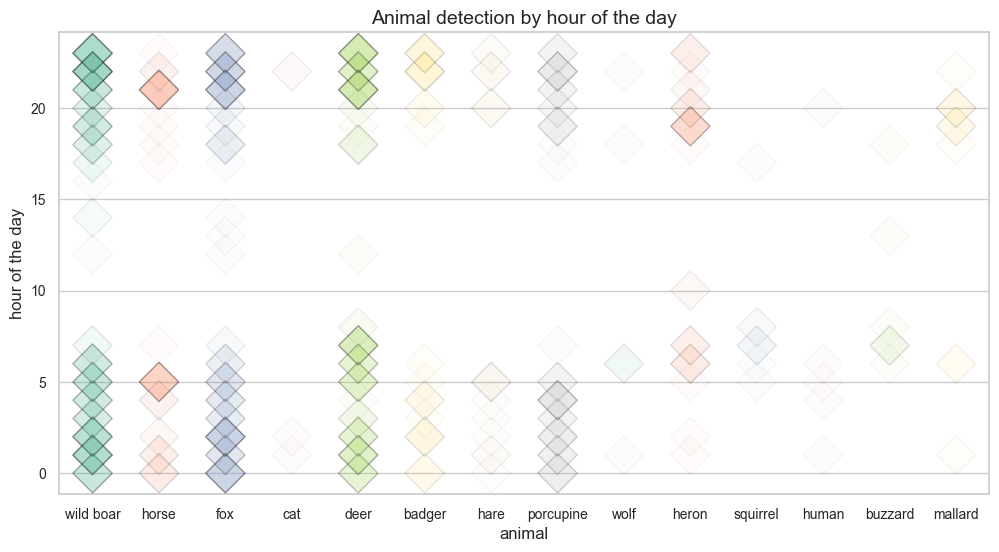

In [123]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['hour'] = df['date'].dt.hour

f, ax = plt.subplots()

c = sns.stripplot(data=df, x="predicted_animal", y="hour", hue="predicted_animal", palette='Set2', 
                  edgecolor='black', ax=ax, legend=False, jitter=False, s=20, marker="D", linewidth=1, alpha=.03,)   

ax.set_ylabel('hour of the day')
ax.set_xlabel('animal')

# v.axes.margins(.05)

c.figure.set_size_inches(12, 6)

plt.title('Animal detection by hour of the day')
plt.show()